## Announcements

- Homework 4 will be posted tomorrow
- This will be a mini-project building on everything we've learned so far.

# Numerical integration and for loops

<!-- <a href="https://medium.freecodecamp.org/optimizing-conways-game-of-life-12f1b7f2f54c" target="_blank"><img src="img/game-of-life.jpg" width=600px /></a> -->
<a href="https://medium.freecodecamp.org/optimizing-conways-game-of-life-12f1b7f2f54c" target="_blank"><img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/game-of-life.jpg" width=600px /></a>

## PHYS 2600: Scientific Computing

## Lecture 7

## Discretization

In math, __discrete__ is the opposite of __continuous__; it refers to finite sets of objects that are distinct and well-separated.  Since computers have a finite memory, we typically work with __discretizations__ (discrete approximations).

For example, here is a discretization of the continuous interval $[0,1]$, visually and then using `np.linspace`:

<!-- <img src="img/discrete-01.png" width=400px /> -->
<img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/discrete-01.png" width=400px />

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

(Discrete sets don't have to be evenly spaced, but in this class we'll generally assume they are.  An evenly-spaced discretization is also known as a __grid__, __mesh__, or __lattice__.)

Discretizing an interval on its own is not very interesting!  But if we have a function $f(x)$, then we can apply it to a discrete domain $\{x_i\}$:

$$
\{y_0, y_1, ..., y_N\} = \{ f(x_0), f(x_1), ..., f(x_N) \}.
$$

(This is just a vectorized application of $f(x)$, what NumPy is designed for!)  

We can take the _samples_ $\{y_i\}$ and use them to do things like plot $y = f(x)$, or compute the integral $\int f(x) dx$.  

You've already used discrete intervals to make plots many times:

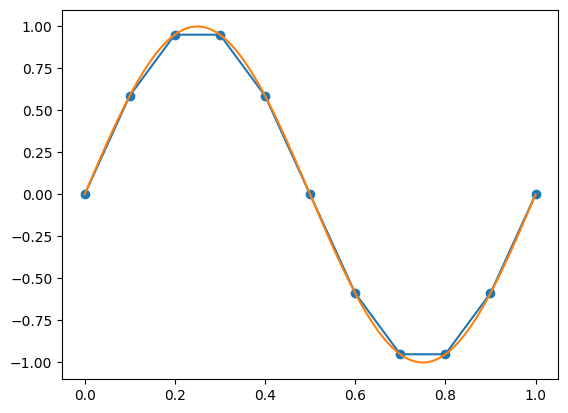

In [2]:
x_coarse = np.linspace(0,1,11)
x_fine = np.linspace(0,1,200)

plt.plot(x_coarse,np.sin(2*np.pi*x_coarse),marker='o')
plt.plot(x_fine,np.sin(2*np.pi*x_fine))

As shown in the plot, one interval has many possible discretizations: _any_ `np.linspace(0,1,N)` represents the interval $[0,1]$ using $N$ points.  The __resolution__ or __grid spacing__ $a$ is determined by $N$:

$$
a = \frac{1-0}{N-1} 
$$

or $a = 1/10 = 0.1$ for 11 points, $a \approx 0.005$ for 200 points.

Strictly, to get the right answers we should take the __continuum limit__ $a \rightarrow 0$.  This gets rid of any effects due to discrete sampling.

We can see the difference between our interpolation of `sin(x)` and the real function by eye; this difference is an example of __discretization error__, which you'll explore more in today's tutorial.

The easy way to fix discretization error is just _take more samples_!  (There are real-world problems where the functions are expensive, i.e., they are intensive to compute or come from an experiment, and then we have to work with what we have and understand error carefully.)

<!-- <img src="img/pixel-mona-lisa.jpg" width=250px style="float:right;" /> -->
<img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/pixel-mona-lisa.jpg" width=250px style="float:right;" />

Even in pure computing, discretization is sometimes a good trade-off.  The key is always understanding __how much discretization error you can afford to suffer__.  Again, we'll avoid a formal discussion; usually you can figure this out by trial and error.

## Discrete integration = Quadrature

Integrals are ubiquitous in physics, but they can be a pain to deal with: even for the ones that _can_ be done analytically, you often have to find just the right set of variable changes to tease out the answer.

On the other hand, if we have a discrete representation of a function, it's easy to find the integral numerically!  In fact, [the way integrals are often introduced](https://en.wikipedia.org/wiki/Integral) is starting with a discrete sample of a function, as in this image from Wikipedia.

<!-- <img src="img/Integral_approximations.png" width=300px style="float:right;" /> -->
<img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/Integral_approximations.png" width=300px style="float:right;" />

The integral of $f(x)$ is the area under the curve, which is just the sum of the areas of the boxes with side lengths $f(x)$ and $dx$.  We can write a formula following the green boxes:

$$
\int f(x) dx \approx a \sum_{i=0}^{N-2} f(x_i)
$$
identifying $dx = a$ for our discrete grid.

We can recognize the curve traced by the top of the boxes as an approximation of $f(x)$, but a particularly simple (and not very accurate) one!



<!-- <img src="img/trapz.png" width=500px  style="float:right;" /> -->
<img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/trapz.png" width=500px  style="float:right;" />


We can do better by starting from a linear approximation to $f(x)$.  Now the area under our curve is approximated by _trapezoids_, instead of rectangles.

Summing over the area of all the trapezoids, we find that every point $x_i$ appears twice except the endpoints.  Working on a grid, for the full integral we find:

$$
\int dx\ f(x) \approx a\frac{y_0+y_1}{2}+a\frac{y_1+y_2}{2}+\dots+a\frac{y_{N-3}+y_{N-2}}{2}+a\frac{y_{N-2}+y_{N-1}}{2} = \frac{a}{2} \left[ y_0 + y_{N-1} + 2 \sum_{i=1}^{N-2} y_i \right].
$$

This is called, unsurprisingly, the __trapezoidal rule__.

## `for` loops and `range(...)`

For loops let you **repeat a block of code once for each item** in a sequence (a list, string, NumPy array, or an integer *range*).  
In Python we iterate **over items**, not “by index” like in some other languages.

**`range` generates integer sequences.** It’s *lazy* in the sense that numbers are produced on demand, rather than computed all at once like how `numpy.arange(..)` does.

- `range(stop)` --> `0, 1, 2, ..., stop-1` (half-open interval)
- `range(start, stop)` --> `start, ..., stop-1`
- `range(start, stop, step)` --> `start, start+step, start+2*step,...` (still half-open interval)


In [3]:
# This is just to visualize different ranges by turning them into lists 
# in real code you don't usually need list(...)
print(f"range(5)         --> {list(range(5))}")            # 0 to 4
print(f"range(1, 6)      --> {list(range(1, 6))}")         # 1 to 5
print(f"range(0, 10, 2)  --> {list(range(0, 10, 2))}")     # even numbers below 10
print(f"range(10, 0, -3) --> {list(range(10, 0, -3))}")    # counting down by 3's (stop excluded)

range(5)         --> [0, 1, 2, 3, 4]
range(1, 6)      --> [1, 2, 3, 4, 5]
range(0, 10, 2)  --> [0, 2, 4, 6, 8]
range(10, 0, -3) --> [10, 7, 4, 1]


**Common uses of `for` loops**
- *Accumulation:* build a sum/product/array one step at a time.
- *Search / argmax:* scan items, remember the “best so far.”

For example, we can compute compute the sum

$$
\sum_{k=m}^{n}k=m+ (m+1)+\dots+ n
$$

using the `my_sum(m, n)` function defined below:

In [4]:

def my_sum(m, n):
    val = m
    # Since we already set val=m, we can start our loop at k=m+1
    for k in range(m+1, n+1): # m+1 <= k < n+1
        val += k
    return val

print(f"{my_sum(13, 17)=}")

my_sum(13, 17)=75


Now, let's use a `for` loop to approximate $\int_0^{2\pi}\sin^2(x) dx$ using trapezoidal-rule quadrature.

$$
\int f(x) dx \approx a\frac{y_0+y_1}{2}+a\frac{y_1+y_2}{2}+\dots+a\frac{y_{N-3}+y_{N-2}}{2}+a\frac{y_{N-2}+y_{N-1}}{2}
$$

In [5]:
def f(x):
    return np.sin(x)**2

N = 10 # number of grid points
x_min, x_max = 0, 2*np.pi # interval boundaries
a = (x_max-x_min)/(N-1) # grid spacing

I = 0
for n in range(1, N):
    x_n = a*n
    x_n_minus_1 = a*(n-1)
    y_n = f(x_n)
    y_n_minus_1 = f(x_n_minus_1)
    I += a*(y_n+y_n_minus_1)/2
print(f"{I=}")

I=np.float64(3.141592653589793)


### Turning the loop into a reusable function

- A `for` loop can live **inside a function**.
- In Python, we can **pass a function as an argument** to another function. `my_trapint` takes an integrand `f(x)` and calls it inside the loop.
- Reuse: call the same integrator with different functions, intervals, number of grid points without having to repeat code.



In [6]:

def my_trapint(f, x_min, x_max, N):
    a = (x_max-x_min)/(N-1)

    I = 0
    for n in range(1, N):
        x_n = a*n
        x_n_minus_1 = a*(n-1)
        y_n = f(x_n)
        y_n_minus_1 = f(x_n_minus_1)
        I += a*(y_n+y_n_minus_1)/2
    return I

def f1(x):
    return np.sin(x)**2

def f2(x):
    return np.cos(5*x)
    
I1 = my_trapint(f1, 0, 2*np.pi, 10)
print(f"{I1=}")
I2 = my_trapint(f2, -np.pi, np.pi, 30)
print(f"{I2=}")

I1=np.float64(3.141592653589793)
I2=np.float64(-2.4147350785597155e-15)


It probably won't surprise you to learn that trapezoidal-rule quadrature is so common that there is already a NumPy function for it:

In [7]:
# Integral of sin^2(x) from 0 to 2*pi should be pi
x_int = np.linspace(0, 2*np.pi, 10)
I_trap = np.trapezoid(np.sin(x_int)**2, x=x_int)

print(I_trap)
print(I_trap - np.pi)

3.1415926535897927
-4.440892098500626e-16


`np.trapezoid` figures out the grid spacing from the array `x_int`; we can also just give it the grid spacing using the `dx=` argument.  (You can actually use `np.trapezoid` with non-regular grids as well, using the more general formula; for common applications there's no reason to.)

The SciPy module has [lots of additional options for numerical integration](https://docs.scipy.org/doc/scipy/reference/integrate.html), but the differences mostly amount to improving the amount of discretization error.  There's nothing wrong with using a simple approach like `np.trapezoid` until you need something fancier!  (As long as you can make your grid fine enough, `np.trapezoid` will give the same answer as any more complicated integrator.)

## Setting up numerical integrals

Numerical integration is great - it can let us deal with integrals that are difficult to impossible analytically.  But it doesn't free us from __thinking about what we're doing!__

In fact, the technique of variable transformation is still crucial even for numerical integrals.  Suppose we're interested in evaluating the following integral:

$$
\int_0^\infty dx \frac{1}{(e^x+1)^2} =\ I
$$

This is an __improper integral__, so how can we possibly deal with it numerically with a finite number of points?  Just as when we do analytic integrals, the best answer is to _transform the variables_ - although our goals are sort of different if we're transforming for a numerical evaluation.

Our goal is to map the infinite interval into a finite one.  In this case, the obvious choice will do that for us: if we take $u = 1/(e^x+1)$, then

$$
du = -dx \frac{e^x}{(e^x+1)^2} = dx\ u^2 (1-1/u)
$$

$dx\ u^2$ is just the current integrand, so we have

$$
I = \int_{x=0}^{x=\infty} \frac{du}{1-1/u}.
$$

Finally, fixing the limits: we have $x=0 \rightarrow u=1/2$ and $x=\infty \rightarrow u = 0$.  Taking an overall minus sign to flip the limits back to the correct order, we end up with:

$$
I = \int_0^{1/2} \frac{du}{1/u-1}
$$





Now we can evaluate our transformed integral numerically, being careful to avoid $u=0$ because of the $1/u$ in the denominator: (if you try this with 0, it will actually still work, but you'll get a warning message.)

In [8]:
u = np.linspace(1e-16, 0.5, 50)
u_integrand = 1/(1/u-1)

print(np.trapezoid(u_integrand, x=u))
print(-0.5 + np.log(2.0))  # exact answer

0.19317321002551163
0.1931471805599453


We'll see some other approaches to improper integrals on the tutorial.


Aside from improper integrals, we also have to worry about __singularities__ - places where the integrand goes to infinity can cause numerical instability.  Integral transforms are the best way to deal with them, typically.

All of this extends to higher dimensions; the way you do integrals in 2d or above is more complicated but not any more interesting.  (Exception: when the dimension gets _really_ large, we'll turn to a completely different method - Monte Carlo integration.)

## Tutorial 7

Let's get some hands-on experience - load up `tut07`.